In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [92]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False   # 设置符号显示

In [93]:
path = './Datas/housing_price.csv'
data = pd.read_csv(path)
data.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 数据标准化

In [94]:
data = (data - data.mean()) / data.std()
data.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [95]:
## 添加辅助项 Auxiliary 用来计算代价和梯度
data.insert(0, 'Auxiliary', 1)
data.head()

,Auxiliary,面积,房间数,价格
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


# 确定训练数据X 和 目标变量y

In [96]:
clos = data.shape[1]
clos

4

In [97]:
X = data.iloc[:, 0:clos - 1]
y = data.iloc[:, clos - 1:clos]

In [98]:
X, X.shape

(    Auxiliary        面积       房间数
 0           1  0.130010 -0.223675
 1           1 -0.504190 -0.223675
 2           1  0.502476 -0.223675
 3           1 -0.735723 -1.537767
 4           1  1.257476  1.090417
 5           1 -0.019732  1.090417
 6           1 -0.587240 -0.223675
 7           1 -0.721881 -0.223675
 8           1 -0.781023 -0.223675
 9           1 -0.637573 -0.223675
 10          1 -0.076357  1.090417
 11          1 -0.000857 -0.223675
 12          1 -0.139273 -0.223675
 13          1  3.117292  2.404508
 14          1 -0.921956 -0.223675
 15          1  0.376643  1.090417
 16          1 -0.856523 -1.537767
 17          1 -0.962223 -0.223675
 18          1  0.765468  1.090417
 19          1  1.296484  1.090417
 20          1 -0.294048 -0.223675
 21          1 -0.141790 -1.537767
 22          1 -0.499157 -0.223675
 23          1 -0.048673  1.090417
 24          1  2.377392 -0.223675
 25          1 -1.133356 -0.223675
 26          1 -0.682873 -0.223675
 27          1  0.66

In [99]:
y, y.shape

(          价格
 0   0.475747
 1  -0.084074
 2   0.228626
 3  -0.867025
 4   1.595389
 5  -0.323998
 6  -0.204036
 7  -1.130948
 8  -1.026973
 9  -0.783051
 10 -0.803053
 11  0.052682
 12 -0.083283
 13  2.874981
 14 -0.643896
 15  0.875619
 16 -0.323998
 17 -1.123743
 18  1.276275
 19  2.068039
 20 -0.699878
 21 -0.683083
 22 -0.779852
 23 -0.643896
 24  1.867303
 25 -0.723870
 26  0.992382
 27  1.028370
 28  1.076355
 29 -0.323998
 30  0.075875
 31 -1.363666
 32 -0.204036
 33  1.915287
 34 -0.435962
 35 -0.723870
 36 -0.883819
 37  0.036687
 38  1.668166
 39 -0.427165
 40  0.224627
 41 -0.084074
 42 -0.211234
 43 -0.331196
 44 -1.283692
 45 -0.323998
 46 -0.807044,
 (47, 1))

# 初始化 `特征变量X` `目标变量y` `权重w`

In [100]:
X = X.values
y = y.values
w = np.zeros((X.shape[1], 1))

In [101]:
X.shape, y.shape, w.shape

((47, 3), (47, 1), (3, 1))

# 构建代价函数

In [102]:
def computeCost(X, y, w):
    """
    构建线性模型的代价函数
    :param X: 特征变量，形状为 [n_samples, n_features]
    :param y: 目标变量，形状为 [n_samples, 1]
    :param w: 权重向量，形状为 [n_features, 1]
    :return: 代价函数值
    """
    # 计算预测值与实际值之差的平方和
    inner = np.power(X @ w -y, 2)
    
    # 对平方和进行求和，并处以样本数量的两倍，得到代价函数的值
    output = np.sum(inner) / (2 * len(X))
    
    return output

In [103]:
computeCost(X, y, w)

0.48936170212765967

# 构建小批量梯度下降算法

In [104]:
def batch_gradientDescent(X, y, w, alpha, count):
    """
    小批量梯度下降算法
    :param X: 特征矩阵，形状为 [n_samples, n_features]
    :param y: 标签向量，形状为 [n_samples, 1]
    :param w: 权重向量，形状为 [n_features, 1]
    :param alpha: 学习率 
    :param count: 迭代次数
    :return: 
        - w: 更新后的权重向量
        - costs: 每次迭代的代价函数值列表
    """
    # 初始化代价函数值列表
    costs = []
    
    # 对每个样本进行迭代
    for i in range(count):
        # 根据公式更新权重向量
        w = w - (X.T @ (X @ w - y) * alpha / len(X))
        
        # 计算当前代价函数并添加到列表中
        cost = computeCost(X, y, w)
        costs.append(cost)
        
        # 每隔100次迭代输出一次当前代价函数值
        if i % 100 == 0:
            print(f'在第{i}次迭代中，cost的值是：{cost}')
        
    return w, costs

# 初始化附加变量-学习率α和要执行的迭代次数

In [105]:
alpha = 0.01
iters = 2000

# 执行梯度下降算法，使得参数θ适合于训练集

In [106]:
w, costs = batch_gradientDescent(X, y, w, alpha, iters)

在第0次迭代中，cost的值是：0.4805491041076719
在第100次迭代中，cost的值是：0.18209443801333897
在第200次迭代中，cost的值是：0.1479382495738683
在第300次迭代中，cost的值是：0.1377591345050687
在第400次迭代中，cost的值是：0.1336603777249612
在第500次迭代中，cost的值是：0.1319404652949001
在第600次迭代中，cost的值是：0.13121540352412622
在第700次迭代中，cost的值是：0.13090958448719198
在第800次迭代中，cost的值是：0.13078058791637864
在第900次迭代中，cost的值是：0.13072617594607358
在第1000次迭代中，cost的值是：0.13070322444853422
在第1100次迭代中，cost的值是：0.1306935432832584
在第1200次迭代中，cost的值是：0.13068945967339024
在第1300次迭代中，cost的值是：0.1306877371669466
在第1400次迭代中，cost的值是：0.13068701059694005
在第1500次迭代中，cost的值是：0.13068670412262967
在第1600次迭代中，cost的值是：0.13068657484877846
在第1700次迭代中，cost的值是：0.130686520319808
在第1800次迭代中，cost的值是：0.13068649731895685
在第1900次迭代中，cost的值是：0.13068648761697357


# 获得权重向量

In [107]:
print(w)

[[-9.95066913e-17]
 [ 8.84682367e-01]
 [-5.30951990e-02]]


In [108]:
computeCost(X, y, w)

0.1306864835504653

# 可视化模型训练损失随训练的Epoch变化

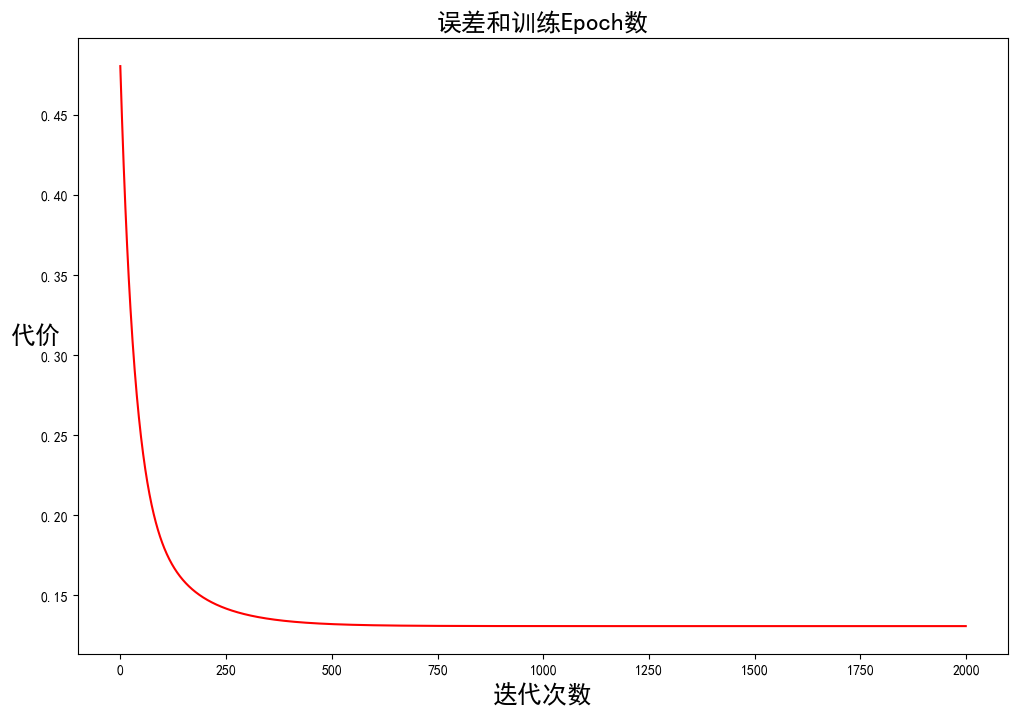

In [109]:
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 8))
# 绘制代价值随迭代次数的变化曲线
ax.plot(np.arange(iters), costs, 'r')
# 设置x轴和y轴
ax.set_xlabel('迭代次数', fontsize=18)
ax.set_ylabel('代价', rotation=0, fontsize=18)
# 设置图标题
ax.set_title('误差和训练Epoch数', fontsize=18)
# 显示图形
plt.show()